<function matplotlib.pyplot.show(close=None, block=None)>

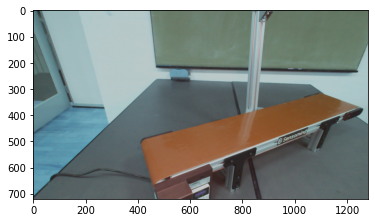

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#imgL = cv2.imread('Week 3/tsukuba_left.png')
#imgR = cv2.imread('Week 3/tsukuba_right.png')
#imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
#imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

#map the matrix file with images
imgL = cv2.imread(r'Stereo_conveyor_without_occlusions\left\1585434279_805531979_Left.png')
imgR = cv2.imread(r'Stereo_conveyor_without_occlusions\right\1585434279_805531979_right.png')
rect_map_left_x = np.load(r'matrix_calib_rectify\map_left_x.npy')
rect_map_left_y = np.load(r'matrix_calib_rectify\map_left_y.npy')
rect_map_right_x = np.load(r'matrix_calib_rectify\map_right_x.npy')
rect_map_right_y = np.load(r'matrix_calib_rectify\map_right_y.npy')
imgL = cv2.remap(imgL, rect_map_left_x, rect_map_left_y, cv2.INTER_LINEAR)
imgR = cv2.remap(imgR, rect_map_right_x, rect_map_right_y, cv2.INTER_LINEAR)

plt.imshow(imgL, cmap='gray')
plt.show

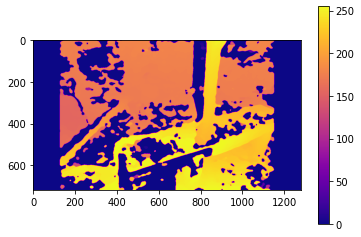

In [2]:
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=5)

stereo = cv2.StereoSGBM_create(
    minDisparity=-128,
    numDisparities=256,
    blockSize=11,
    uniquenessRatio=5,
    speckleWindowSize=200,
    speckleRange=2,
    disp12MaxDiff=0,
    P1=8 * 1 * 11 * 11,
    P2=32 * 1 * 11 * 11,
)

"""
stereo = cv2.StereoSGBM_create(numDisparities=75,
                                   blockSize=9,
                                   minDisparity=1,
                                   disp12MaxDiff=130,
                                   uniquenessRatio=1,
                                   speckleRange=20,
                                   speckleWindowSize=125,
                                   preFilterCap=30,
                                   mode=cv2.STEREO_SGBM_MODE_HH)
"""                        
disparity_SGBM = stereo.compute(imgL, imgR)

# Normalize the values to a range from 0..255 for a grayscale image
disparity_SGBM = cv2.normalize(disparity_SGBM, disparity_SGBM, alpha=255,
                              beta=0, norm_type=cv2.NORM_MINMAX)
disparity_SGBM = np.uint8(disparity_SGBM)
disparity_SGBM = cv2.medianBlur(disparity_SGBM, 15)

#disparity = stereo.compute(imgL,imgR)
#plt.imshow(disparity_SGBM,'gray')

plt.imshow(disparity_SGBM, cmap='plasma')
plt.colorbar()
plt.show()

(720, 1280, 3)


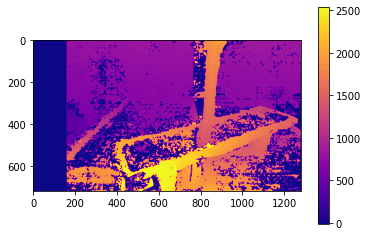

In [5]:
def computeDisparity(left, right): #left and right undistoreted and rectified images (3 channels)
    stereo = cv2.StereoSGBM_create(minDisparity=0,
                                   numDisparities=int((1280 / 8) + 15) & -16,#160
                                   blockSize=5,
                                   P1=8*3*5**2, #600
                                   P2=32*3*5**2, #2400
                                   disp12MaxDiff=100,
                                   preFilterCap=32,
                                   uniquenessRatio=10,
                                   speckleWindowSize=0,
                                   speckleRange=32)
    disp = stereo.compute(left, right)
    disp = cv2.medianBlur(disp, 5)
    return disp

print(imgR.shape)
disp = computeDisparity(imgL, imgR)
plt.imshow(disp, cmap='plasma')
plt.colorbar()
plt.show()

In [16]:
def getDepth(x, y, disparity, focal_lenght=685, baseline=120):
    return focal_lenght*baseline/(disparity[y,x]/16.0) #in mm

print(getDepth(1000, 500, disp))

727.836192584394


2400
